# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Concise-Implementation-of-Linear-Regression" data-toc-modified-id="Concise-Implementation-of-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Concise Implementation of Linear Regression</a></div><div class="lev2 toc-item"><a href="#Creating-Data-Sets" data-toc-modified-id="Creating-Data-Sets-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating Data Sets</a></div><div class="lev2 toc-item"><a href="#Reading-Data" data-toc-modified-id="Reading-Data-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reading Data</a></div><div class="lev2 toc-item"><a href="#Define-the-Model" data-toc-modified-id="Define-the-Model-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Define the Model</a></div><div class="lev2 toc-item"><a href="#Initialize-Model-Parameters" data-toc-modified-id="Initialize-Model-Parameters-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initialize Model Parameters</a></div><div class="lev2 toc-item"><a href="#Define-the-Loss-Function" data-toc-modified-id="Define-the-Loss-Function-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Define the Loss Function</a></div><div class="lev2 toc-item"><a href="#Define-the-Optimization-Algorithm" data-toc-modified-id="Define-the-Optimization-Algorithm-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Define the Optimization Algorithm</a></div><div class="lev3 toc-item"><a href="#How-to-adjust-the-learning-rate" data-toc-modified-id="How-to-adjust-the-learning-rate-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>How to adjust the learning rate</a></div><div class="lev2 toc-item"><a href="#Training" data-toc-modified-id="Training-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Training</a></div><div class="lev2 toc-item"><a href="#Notes" data-toc-modified-id="Notes-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Notes</a></div>

# Concise Implementation of Linear Regression

## Creating Data Sets

Creating data as that used in the previous section. `features` and `labels`.


In [20]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch 
import numpy as np

In [21]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2


features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

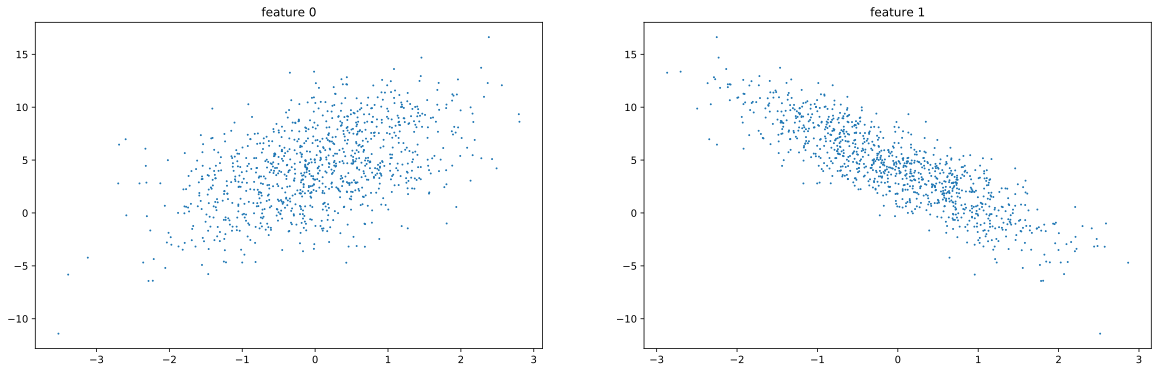

In [22]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.title("feature 0")
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);
plt.subplot(1,2,2)
plt.title("feature 1")
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

## Reading Data


In [23]:
import torch.utils.data as Data
batch_size = 10

dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

In [24]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.5774,  0.1511],
        [ 0.7823,  0.5684],
        [-0.7305,  1.1786],
        [ 0.1046,  1.7838],
        [ 0.8746,  1.0734],
        [ 0.7686, -0.3755],
        [-0.0164,  0.4239],
        [ 0.4347,  0.8943],
        [ 1.8989, -0.9120],
        [ 0.5346,  0.6431]]) tensor([ 2.5258,  3.8154, -1.2731, -1.6692,  2.3046,  7.0046,  2.7139,  2.0300,
        11.0925,  3.0920])


## Define the Model

In [25]:
from torch import nn

In [26]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)
print(net)
        

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


We also can use `nn.Sequential` to define the model

In [27]:
# Method 1 
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
)

print(net)
print(net[0])

# Method 2 
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))

print(net)
print(net[0])

# Method 3 
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('linear', nn.Linear(num_inputs, 1))
]))

print(net)
print(net[0])


Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)
Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


parameters

In [28]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.5715, -0.3187]], requires_grad=True)
Parameter containing:
tensor([0.6625], requires_grad=True)


## Initialize Model Parameters

In [29]:
from torch.nn import init

In [30]:

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)

print(net.parameters())

<generator object Module.parameters at 0x1230b49e8>


## Define the Loss Function

In [31]:
loss = nn.MSELoss() # mean square error

## Define the Optimization Algorithm

There are already optimization algorithms in `torch.optim`, like `SGD`, `Adam`, `RMSProp`.

We will use "SGD" (Stochastic Gradient Descent: do not use all data in one step for updating the parameters) with learning rate 0.03.

In [32]:
import torch.optim as optim

In [33]:
optimizer = optim.SGD(net.parameters(), lr=0.03) #learning rate = 0.03
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### How to adjust the learning rate

If we want to change the learning rate

In [34]:
# for param_group in optimizer.param_groups:
 #   param_group['lr'] *= 0.1

In [35]:
print(y)
print(y.view(-1, 1))

tensor([ 2.5258,  3.8154, -1.2731, -1.6692,  2.3046,  7.0046,  2.7139,  2.0300,
        11.0925,  3.0920])
tensor([[ 2.5258],
        [ 3.8154],
        [-1.2731],
        [-1.6692],
        [ 2.3046],
        [ 7.0046],
        [ 2.7139],
        [ 2.0300],
        [11.0925],
        [ 3.0920]])


## Training

In [40]:
num_epochs = 3

for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # zero out the gradient, otherwise the gradient will be accumulated in backprop
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))
        

epoch 1, loss: 0.000064
epoch 2, loss: 0.000108
epoch 3, loss: 0.000094


In [41]:
dense = net[0]

In [42]:
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9993, -3.4008]], requires_grad=True)
4.2 Parameter containing:
tensor([4.1999], requires_grad=True)


## Notes

* `torch.utils.data` loads the data
* `torch.nn` has the net
* `torch.nn.init` has the initialization methods
* `torch.optim` offers different kinds of optimization methods